<a href="https://colab.research.google.com/github/leeje008/ML_final_project/blob/main/smote_variant_add_ada_gbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import time
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')


# load The loan train data set

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Loan_Train.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df = df.drop('Id',axis = 1)


from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

data = df


for e in data.columns:
    if data[e].dtype == 'object':
        labelEncoder.fit(list(data[e].values))
        data[e] = labelEncoder.transform(data[e].values)
        
        # Accommodate the data that has been changed
        df = data
        
y = df.Risk_Flag
X = df.drop('Risk_Flag', axis=1)

In [5]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
 # ! pip install smote-variants
y_train

152242    0
77343     0
160600    1
182346    0
80712     0
         ..
136767    0
204614    0
214353    0
214539    0
176991    0
Name: Risk_Flag, Length: 176400, dtype: int64

In [ ]:
import smote_variants as sv

oversampler= sv.distance_SMOTE(random_state = 101, n_jobs = -1)


start = time.time()

X_samp, y_samp = oversampler.sample(X_train, y_train)

end = time.time()

print(f"{end - start:.5f} sec")

2021-11-28 14:49:42,767:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': -1, 'random_state': 101}")


KeyError: ignored

In [ ]:
from imblearn.over_sampling import SVMSMOTE

start = time.time()


svmsmote = SVMSMOTE(random_state = 101, n_jobs = -1)


X_over_svm, y_over_svm = svmsmote.fit_resample(X_train, y_train)

end = time.time()


print(f"{end - start:.5f} sec")

660.94727 sec


In [ ]:
X_over_svm = pd.DataFrame(X_over_svm)
y_over_svm = pd.DataFrame(y_over_svm)



X_over_svm.to_csv('/content/drive/MyDrive/X_over_svm.csv')
y_over_svm.to_csv('/content/drive/MyDrive/y_over_svm.csv')




In [8]:
X_over_svm = pd.read_csv('/content/drive/MyDrive/X_over_svm.csv')
y_over_svm = pd.read_csv('/content/drive/MyDrive/y_over_svm.csv')

In [ ]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


In [ ]:
X_over_svm

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,8196231,37,14,1,2,1,20,63,1,7,13
1,2869872,56,19,1,2,0,19,86,1,11,12
2,7361429,58,2,1,2,0,50,292,12,2,12
3,5921974,25,3,0,2,0,50,194,6,3,11
4,1583605,45,13,1,2,0,5,249,13,13,14
...,...,...,...,...,...,...,...,...,...,...,...
309419,6715263,29,0,1,2,0,46,82,13,0,11
309420,2143718,25,0,1,0,1,19,166,12,0,10
309421,2024213,38,19,1,2,0,12,88,4,8,14
309422,8773158,58,18,1,2,1,24,265,28,5,13


In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.utils import resample
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
import time
from imblearn.metrics import geometric_mean_score

import warnings
warnings.filterwarnings(action='ignore')


def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc = roc_auc_score(y_test, pred)
    g_mean = geometric_mean_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도 {1:4f}, 재현율 {2:4f}, AUC {3:4f},G_MEAN {4:4f}'.format(accuracy , precision , recall,roc,g_mean))
    

def get_model_train_eval(model,ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)


from sklearn.linear_model import LogisticRegression


from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.neural_network import MLPClassifier

from sklearn import svm


from sklearn.neighbors import KNeighborsClassifier


In [9]:
X_over_svm.drop('Unnamed: 0',axis = 1,inplace = True)
y_over_svm.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
lr_clf = LogisticRegression()
tree = DecisionTreeClassifier()
rlf =RandomForestClassifier(n_estimators=100, 
                               random_state=101, 
                               min_samples_leaf=2, 
                               criterion='entropy',
                           n_jobs = -1)

from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    use_label_encoder=False,
                    random_state=2021)

lgb = LGBMClassifier(n_estimators= 400,boost_from_average = False)
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
nn = MLPClassifier()
knn = KNeighborsClassifier(n_neighbors = 3)


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('xgb')

get_model_train_eval(xgb , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.47888 sec
decision tree
오차행렬
[[57499  8793]
 [ 1368  7940]]
정확도: 0.865595, 정밀도 0.474511, 재현율 0.853030, AUC 0.860195,G_MEAN 0.860165
2.11789 sec
random forest
오차행렬
[[59000  7292]
 [ 1748  7560]]
정확도: 0.880423, 정밀도 0.509022, 재현율 0.812205, AUC 0.851103,G_MEAN 0.850214
47.18214 sec
xgb
오차행렬
[[50673 15619]
 [ 2599  6709]]
정확도: 0.759021, 정밀도 0.300475, 재현율 0.720778, AUC 0.742584,G_MEAN 0.742264
148.97006 sec
lgb
오차행렬
[[58365  7927]
 [ 1843  7465]]
정확도: 0.870767, 정밀도 0.484992, 재현율 0.801998, AUC 0.841211,G_MEAN 0.840296
13.04694 sec
lda
오차행렬
[[33557 32735]
 [ 4225  5083]]
정확도: 0.511111, 정밀도 0.134407, 재현율 0.546089, AUC 0.526145,G_MEAN 0.525766
0.64904 sec
qda
오차행렬
[[29226 37066]
 [ 3417  5891]]
정확도: 0.464511, 정밀도 0.137137, 재현율 0.632896, AUC 0.536882,G_MEAN 0.528227
0.32158 sec
nn
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.00

In [14]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_over_svm = np.array(X_over_svm)
y_over_svm = np.array(y_over_svm)

In [17]:
print(X_val.shape)
print(X_over_svm.shape)

(75600, 11)
(309424, 11)


Epoch 1/100
1209/1209 [==============================] - 7s 5ms/step - loss: 13878253205208180981760.0000 - accuracy: 0.4988 - val_loss: 0.6949 - val_accuracy: 0.1231
Epoch 2/100
1209/1209 [==============================] - 5s 5ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6880 - val_accuracy: 0.8769
Epoch 3/100
1209/1209 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6865 - val_accuracy: 0.8769
Epoch 4/100
1209/1209 [==============================] - 5s 5ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6906 - val_accuracy: 0.8769
Epoch 5/100
1209/1209 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.7021 - val_accuracy: 0.1231
Epoch 6/100
1209/1209 [==============================] - 6s 5ms/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6897 - val_accuracy: 0.8769
Epoch 7/100
1209/1209 [==============================] - 5s 4ms/step - loss: 0.6932 - accuracy: 0.5007 - val

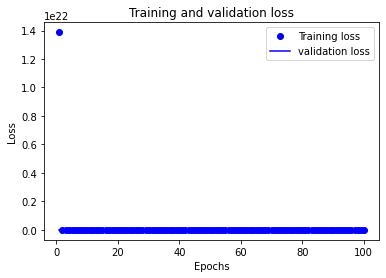

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import losses
from keras import layers, models
from tensorflow.keras.optimizers import SGD
from keras import metrics
import keras







model = keras.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_shape=(11, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


model.compile(optimizer = SGD(lr=0.1), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_over_svm, y_over_svm, epochs=100,
                    batch_size=256, validation_data=(X_val, y_val))

history_dic = history.history
history_dic.keys()  

import matplotlib.pyplot as plt
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()






In [27]:
pred = model.predict(X_val)
roc = roc_auc_score(y_val, pred)
print(roc)

0.5


adasyn modeling

In [ ]:
X_over_ada = pd.read_csv('/content/drive/MyDrive/x_adasyn.csv')
y_over_ada = pd.read_csv('/content/drive/MyDrive/y_adasyn.csv')
X_over_ada.drop('Unnamed: 0',axis = 1,inplace = True)
y_over_ada.drop('Unnamed: 0',axis = 1,inplace = True)


start = time.time()

print('xgb')



get_model_train_eval(xgb , ftr_train = X_over_ada.values, ftr_test = X_val.values, tgt_train = y_over_ada.values, tgt_test = y_val.values )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")


start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



xgb
오차행렬
[[51918 14374]
 [ 3447  5861]]
정확도: 0.764272, 정밀도 0.289647, 재현율 0.629673, AUC 0.706422,G_MEAN 0.702241
142.25661 sec
logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.42695 sec
decision tree
오차행렬
[[57001  9291]
 [ 1265  8043]]
정확도: 0.860370, 정밀도 0.464001, 재현율 0.864095, AUC 0.861971,G_MEAN 0.861969
1.98194 sec
random forest
오차행렬
[[57608  8684]
 [ 1404  7904]]
정확도: 0.866561, 정밀도 0.476489, 재현율 0.849162, AUC 0.859083,G_MEAN 0.859026
44.18051 sec
lgb
오차행렬
[[57241  9051]
 [ 2158  7150]]
정확도: 0.851733, 정밀도 0.441331, 재현율 0.768156, AUC 0.815812,G_MEAN 0.814419
12.88969 sec
lda
오차행렬
[[36424 29868]
 [ 4918  4390]]
정확도: 0.539868, 정밀도 0.128145, 재현율 0.471637, AUC 0.510543,G_MEAN 0.509058
0.62491 sec
qda
오차행렬
[[41017 25275]
 [ 5677  3631]]
정확도: 0.590582, 정밀도 0.125614, 재현율 0.390095, AUC 0.504413,G_MEAN 0.491288
0.32306 sec
nn
오차행렬
[[   65 66227]
 [    0  9308]]
정확도: 0.123981, 정밀도 0.123228, 재현율 1.000000, AUC 0.500490,G_MEAN 0.03

smote

In [ ]:
X_smote = pd.read_csv('/content/drive/MyDrive/x_smote.csv')
y_smote = pd.read_csv('/content/drive/MyDrive/y_smote.csv')
X_smote.drop('Unnamed: 0',axis = 1,inplace = True)
y_smote.drop('Unnamed: 0',axis = 1,inplace = True)


start = time.time()

print('xgb')



get_model_train_eval(xgb , ftr_train = X_smote.values, ftr_test = X_val.values, tgt_train = y_smote.values, tgt_test = y_val.values )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")


start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



xgb
오차행렬
[[50973 15319]
 [ 2603  6705]]
정확도: 0.762937, 정밀도 0.304441, 재현율 0.720348, AUC 0.744632,G_MEAN 0.744236
150.28274 sec
logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.72969 sec
decision tree
오차행렬
[[57158  9134]
 [ 1298  8010]]
정확도: 0.862011, 정밀도 0.467219, 재현율 0.860550, AUC 0.861383,G_MEAN 0.861382
1.93131 sec
random forest
오차행렬
[[58238  8054]
 [ 1580  7728]]
정확도: 0.872566, 정밀도 0.489672, 재현율 0.830254, AUC 0.854380,G_MEAN 0.854040
50.68920 sec
lgb
오차행렬
[[57768  8524]
 [ 1912  7396]]
정확도: 0.861958, 정밀도 0.464573, 재현율 0.794585, AUC 0.833001,G_MEAN 0.832115
13.20935 sec
lda
오차행렬
[[33796 32496]
 [ 4259  5049]]
정확도: 0.513823, 정밀도 0.134479, 재현율 0.542437, AUC 0.526121,G_MEAN 0.525868
0.66496 sec
qda
오차행렬
[[29605 36687]
 [ 3409  5899]]
정확도: 0.469630, 정밀도 0.138520, 재현율 0.633756, AUC 0.540170,G_MEAN 0.532002
0.33558 sec
nn
오차행렬
[[66269    23]
 [ 9302     6]]
정확도: 0.876653, 정밀도 0.206897, 재현율 0.000645, AUC 0.500149,G_MEAN 0.02

non oversampling

In [ ]:
start = time.time()

print('xgb')



get_model_train_eval(xgb , ftr_train = X_train.values, ftr_test = X_val.values, tgt_train = y_train.values, tgt_test = y_val.values )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")


start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



xgb
오차행렬
[[66109   183]
 [ 8901   407]]
정확도: 0.879841, 정밀도 0.689831, 재현율 0.043726, AUC 0.520483,G_MEAN 0.208818
83.23506 sec
logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.61139 sec
decision tree
오차행렬
[[61250  5042]
 [ 4095  5213]]
정확도: 0.879140, 정밀도 0.508337, 재현율 0.560056, AUC 0.741999,G_MEAN 0.719347
1.07602 sec
random forest
오차행렬
[[63072  3220]
 [ 4426  4882]]
정확도: 0.898862, 정밀도 0.602567, 재현율 0.524495, AUC 0.737961,G_MEAN 0.706413
22.31717 sec
lgb
오차행렬
[[65209  1083]
 [ 7229  2079]]
정확도: 0.890053, 정밀도 0.657495, 재현율 0.223356, AUC 0.603510,G_MEAN 0.468729
8.15719 sec
lda
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.41767 sec
qda
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.24120 sec
nn
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.0000

random over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler


start = time.time()
ros = RandomOverSampler(random_state=101)
X_ros , y_ros = ros.fit_resample(X_train, y_train)


start = time.time()

print('xgb')



get_model_train_eval(xgb , ftr_train = X_ros.values, ftr_test = X_val.values, tgt_train = y_ros.values, tgt_test = y_val.values )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")


start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



xgb
오차행렬
[[51655 14637]
 [ 2220  7088]]
정확도: 0.777024, 정밀도 0.326260, 재현율 0.761495, AUC 0.770350,G_MEAN 0.770299
152.58295 sec
logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.79681 sec
decision tree
오차행렬
[[58837  7455]
 [ 1728  7580]]
정확도: 0.878532, 정밀도 0.504157, 재현율 0.814353, AUC 0.850948,G_MEAN 0.850161
1.62885 sec
random forest
오차행렬
[[60459  5833]
 [ 2120  7188]]
정확도: 0.894802, 정밀도 0.552031, 재현율 0.772239, AUC 0.842125,G_MEAN 0.839220
44.67941 sec
lgb
오차행렬
[[58268  8024]
 [ 1775  7533]]
정확도: 0.870384, 정밀도 0.484219, 재현율 0.809304, AUC 0.844132,G_MEAN 0.843413
12.82823 sec
lda
오차행렬
[[33544 32748]
 [ 3993  5315]]
정확도: 0.514008, 정밀도 0.139637, 재현율 0.571014, AUC 0.538509,G_MEAN 0.537527
0.66420 sec
qda
오차행렬
[[24152 42140]
 [ 2620  6688]]
정확도: 0.407937, 정밀도 0.136971, 재현율 0.718522, AUC 0.541425,G_MEAN 0.511642
0.33961 sec
nn
오차행렬
[[  186 66106]
 [   17  9291]]
정확도: 0.125357, 정밀도 0.123228, 재현율 0.998174, AUC 0.500490,G_MEAN 0.05

In [ ]:
xtrain = np.array(X_train)
ytrain = np.array(y_train)

smote variant

In [ ]:
import smote_variants as sv

oversampler= sv.distance_SMOTE(random_state = 101, n_jobs = -1)


start = time.time()

X_samp, y_samp = oversampler.sample(xtrain, ytrain)

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('xgb')



get_model_train_eval(xgb , ftr_train = X_samp, ftr_test = X_val.values, tgt_train = y_samp, tgt_test = y_val.values )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('logit')

get_model_train_eval(lr_clf , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('decision tree')

get_model_train_eval(tree , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('random forest')


get_model_train_eval(rlf , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('lgb')

get_model_train_eval(lgb , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")

start = time.time()

print('lda')


get_model_train_eval(lda , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('qda')

get_model_train_eval(qda , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()


print(f"{end - start:.5f} sec")


start = time.time()

print('nn')

get_model_train_eval(nn , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")



start = time.time()

print('knn')


get_model_train_eval(knn , ftr_train = X_samp, ftr_test = X_val, tgt_train = y_samp, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

2021-11-28 18:37:05,168:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': -1, 'random_state': 101}")


6.15611 sec
xgb
오차행렬
[[57422  8870]
 [ 3526  5782]]
정확도: 0.836032, 정밀도 0.394622, 재현율 0.621186, AUC 0.743692,G_MEAN 0.733533
163.12140 sec
logit
오차행렬
[[66292     0]
 [ 9308     0]]
정확도: 0.876878, 정밀도 0.000000, 재현율 0.000000, AUC 0.500000,G_MEAN 0.000000
0.71380 sec
decision tree
오차행렬
[[58509  7783]
 [ 1688  7620]]
정확도: 0.874722, 정밀도 0.494709, 재현율 0.818651, AUC 0.850623,G_MEAN 0.850022
1.93378 sec
random forest
오차행렬
[[60751  5541]
 [ 2232  7076]]
정확도: 0.897183, 정밀도 0.560831, 재현율 0.760206, AUC 0.838311,G_MEAN 0.834664
55.51446 sec
lgb
오차행렬
[[60481  5811]
 [ 2245  7063]]
정확도: 0.893439, 정밀도 0.548625, 재현율 0.758810, AUC 0.835576,G_MEAN 0.832042
13.84437 sec
lda
오차행렬
[[33566 32726]
 [ 3980  5328]]
정확도: 0.514471, 정밀도 0.140012, 재현율 0.572411, AUC 0.539373,G_MEAN 0.538360
0.60855 sec
qda
오차행렬
[[23562 42730]
 [ 2538  6770]]
정확도: 0.401217, 정밀도 0.136768, 재현율 0.727331, AUC 0.541379,G_MEAN 0.508442
0.32743 sec
nn
오차행렬
[[    0 66292]
 [    0  9308]]
정확도: 0.123122, 정밀도 0.123122, 재현율 1.000000, AUC 0.500000

In [ ]:
X_samp = pd.DataFrame(X_samp)
y_samp = pd.DataFrame(y_samp)



X_samp.to_csv('/content/drive/MyDrive/X_smova.csv')
y_samp.to_csv('/content/drive/MyDrive/y_smova.csv')

# Adaboost using

In [8]:
X_smote = pd.read_csv('/content/drive/MyDrive/x_smote.csv')
y_smote = pd.read_csv('/content/drive/MyDrive/y_smote.csv')
X_smote.drop('Unnamed: 0',axis = 1,inplace = True)
y_smote.drop('Unnamed: 0',axis = 1,inplace = True)


X_over_ada = pd.read_csv('/content/drive/MyDrive/x_adasyn.csv')
y_over_ada = pd.read_csv('/content/drive/MyDrive/y_adasyn.csv')
X_over_ada.drop('Unnamed: 0',axis = 1,inplace = True)
y_over_ada.drop('Unnamed: 0',axis = 1,inplace = True)

X_over_svm = pd.read_csv('/content/drive/MyDrive/X_over_svm.csv')
y_over_svm = pd.read_csv('/content/drive/MyDrive/y_over_svm.csv')
X_over_svm.drop('Unnamed: 0',axis = 1,inplace = True)
y_over_svm.drop('Unnamed: 0',axis = 1,inplace = True)

X_over_smova = pd.read_csv('/content/drive/MyDrive/X_smova.csv')
y_over_smova = pd.read_csv('/content/drive/MyDrive/y_smova.csv')
X_over_smova.drop('Unnamed: 0',axis = 1,inplace = True)
y_over_smova.drop('Unnamed: 0',axis = 1,inplace = True)


from imblearn.over_sampling import RandomOverSampler


start = time.time()
ros = RandomOverSampler(random_state=101)
X_ros , y_ros = ros.fit_resample(X_train, y_train)

In [13]:

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state = 101)



start = time.time()

print('non over')

get_model_train_eval(clf , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('random over')

get_model_train_eval(clf , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smote')

get_model_train_eval(clf , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('ada')

get_model_train_eval(clf , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('svm')

get_model_train_eval(clf , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smova')

get_model_train_eval(clf , ftr_train = X_over_smova, ftr_test = X_val, tgt_train = y_over_smova, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

non over
오차행렬
[[66285     7]
 [ 9295    13]]
정확도: 0.876958, 정밀도 0.650000, 재현율 0.001397, AUC 0.500646,G_MEAN 0.037370
7.03254 sec
random over
오차행렬
[[37961 28331]
 [ 4107  5201]]
정확도: 0.570926, 정밀도 0.155106, 재현율 0.558767, AUC 0.565700,G_MEAN 0.565657
11.91729 sec
smote
오차행렬
[[36283 30009]
 [ 4228  5080]]
정확도: 0.547130, 정밀도 0.144775, 재현율 0.545767, AUC 0.546544,G_MEAN 0.546543
12.15700 sec
ada
오차행렬
[[38614 27678]
 [ 5090  4218]]
정확도: 0.566561, 정밀도 0.132242, 재현율 0.453159, AUC 0.517821,G_MEAN 0.513768
12.15017 sec
svm
오차행렬
[[34821 31471]
 [ 4228  5080]]
정확도: 0.527791, 정밀도 0.138984, 재현율 0.545767, AUC 0.535517,G_MEAN 0.535419
12.09228 sec
smova
오차행렬
[[44050 22242]
 [ 5382  3926]]
정확도: 0.634603, 정밀도 0.150031, 재현율 0.421788, AUC 0.543136,G_MEAN 0.529407
14.25789 sec


# Gradient boost

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state = 101)


start = time.time()

print('non over')

get_model_train_eval(clf , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('random over')

get_model_train_eval(clf , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smote')

get_model_train_eval(clf , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('ada')

get_model_train_eval(clf , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('svm')

get_model_train_eval(clf , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smova')

get_model_train_eval(clf , ftr_train = X_over_smova, ftr_test = X_val, tgt_train = y_over_smova, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

non over
오차행렬
[[66288     4]
 [ 9293    15]]
정확도: 0.877024, 정밀도 0.789474, 재현율 0.001612, AUC 0.500776,G_MEAN 0.040142
22.79568 sec
random over
오차행렬
[[41512 24780]
 [ 3670  5638]]
정확도: 0.623677, 정밀도 0.185351, 재현율 0.605716, AUC 0.615957,G_MEAN 0.615872
42.28321 sec
smote
오차행렬
[[38491 27801]
 [ 3791  5517]]
정확도: 0.582116, 정밀도 0.165586, 재현율 0.592716, AUC 0.586672,G_MEAN 0.586641
44.30542 sec
ada
오차행렬
[[42653 23639]
 [ 4871  4437]]
정확도: 0.622884, 정밀도 0.158035, 재현율 0.476687, AUC 0.560049,G_MEAN 0.553810
44.09291 sec
svm
오차행렬
[[36801 29491]
 [ 3651  5657]]
정확도: 0.561614, 정밀도 0.160948, 재현율 0.607757, AUC 0.581446,G_MEAN 0.580850
42.87601 sec
smova
오차행렬
[[53090 13202]
 [ 5668  3640]]
정확도: 0.750397, 정밀도 0.216126, 재현율 0.391061, AUC 0.595956,G_MEAN 0.559627
54.51667 sec


In [ ]:


clf = svm.SVC()


start = time.time()

print('non over')

get_model_train_eval(clf , ftr_train = X_train, ftr_test = X_val, tgt_train = y_train, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('random over')

get_model_train_eval(clf , ftr_train = X_ros, ftr_test = X_val, tgt_train = y_ros, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smote')

get_model_train_eval(clf , ftr_train = X_smote, ftr_test = X_val, tgt_train = y_smote, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

start = time.time()

print('ada')

get_model_train_eval(clf , ftr_train = X_over_ada, ftr_test = X_val, tgt_train = y_over_ada, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('svm')

get_model_train_eval(clf , ftr_train = X_over_svm, ftr_test = X_val, tgt_train = y_over_svm, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")


start = time.time()

print('smova')

get_model_train_eval(clf , ftr_train = X_over_smova, ftr_test = X_val, tgt_train = y_over_smova, tgt_test = y_val )

end = time.time()

print(f"{end - start:.5f} sec")

non over


In [11]:
X_val

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
68590,6360531,50,14,1,2,1,19,217,28,8,13
179285,6816226,43,13,1,2,1,19,197,14,4,13
75775,227394,56,12,1,2,0,24,229,2,5,14
65065,3085012,24,0,1,2,0,5,239,11,0,10
207799,3209350,57,5,1,2,1,8,38,11,5,13
...,...,...,...,...,...,...,...,...,...,...,...
172107,5502824,54,16,1,2,1,11,199,25,12,10
224432,7405100,70,12,1,2,0,24,146,25,3,11
19713,2162888,22,2,1,2,0,29,206,28,2,10
25396,9508705,70,12,1,2,0,36,75,2,12,14
